In [10]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");

v3.1
v3.0
v2.1


In [2]:
#create parameters
params = []
ϕas = [0.5, 0.3]
ϕps = [0.1, 0.6]
DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ = (1.0, 20.0, 1.0, 100, 0.01, 2.0, 0.5, 0.3, 0.6, 1e-5, 0.1);
T, save_interval, param_name = (30.0, 0.01, "fig_4")
#T, save_interval, param_name = (20.0, 0.01, "fig_1")
map(ϕas, ϕps) do ϕa, ϕp
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true)
    push!(params,param)
end

2-element Vector{Vector{Any}}:
 [Dict{String, Any}("T" => 30.0, "save_interval" => 0.01, "δ" => 0.1, "δt" => 1.0e-5, "name" => "fig_4", "save_on" => true, "DT" => 1.0, "Lx" => 2.0, "N" => 100, "DR" => 1.0…), Dict{String, Any}("T" => 30.0, "save_interval" => 0.01, "δ" => 0.1, "δt" => 1.0e-5, "name" => "fig_4", "save_on" => true, "DT" => 1.0, "Lx" => 2.0, "N" => 100, "DR" => 1.0…)]
 [Dict{String, Any}("T" => 30.0, "save_interval" => 0.01, "δ" => 0.1, "δt" => 1.0e-5, "name" => "fig_4", "save_on" => true, "DT" => 1.0, "Lx" => 2.0, "N" => 100, "DR" => 1.0…), Dict{String, Any}("T" => 30.0, "save_interval" => 0.01, "δ" => 0.1, "δt" => 1.0e-5, "name" => "fig_4", "save_on" => true, "DT" => 1.0, "Lx" => 2.0, "N" => 100, "DR" => 1.0…)]

In [31]:
#create images
param = params[2]

using KernelDensitySJ, Peaks
images  = []
times   = []
fts     = []
dfs     = []
dts     = []
ϵ = 0.1

#load saves
    T = 30.0
    @pack! param = T
    pde_ts, f_saves = load_compress_pde(param)
    T = 20.0
    @pack! param = T 
    sim_ts, η_saves = load_compress_sim(param)
# create image
    @unpack N, Nx, N₁, N₂ = param
    ft_sim = local_average_timeseries(η_saves, ϵ, N, N₁, N₂)
    t_sim_rgb_image = rho_to_rgb(ft_sim);
    #find peak index
        pk = find_xpeak_ft(sim_ts , ft_sim; time_length = 0.1)
        centre = N₁ ÷ 2 + 1 
        ft_sim         = circshift(ft_sim, (0,-pk + centre, 0))
        t_sim_rgb_image = circshift(t_sim_rgb_image, (pk - centre,0, 0))
    #
    # compute t diff
        dt, df = t_dff(sim_ts , ft_sim; N=N₁, gap = 10)
    #
    push!(images, t_sim_rgb_image)
    push!(times, sim_ts)
    push!(fts, ft_sim)
    push!(dfs, df)
    push!(dts, dt)

    ft_pde = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
    t_pde_rgb_image = rho_to_rgb(ft_pde);
    #find peak index and shift to centre
        pk = find_xpeak_ft(pde_ts , ft_pde; time_length = 0.1)
        centre = Nx ÷ 2 + 1 
        shift = Nx ÷ 2
        ft_pde          = circshift(ft_pde, (0,-pk, 0))
        t_pde_rgb_image = circshift(t_pde_rgb_image, (pk,0, 0))
    #
    # compute t diff
        dt, df = t_dff(pde_ts , ft_pde; N=Nx)
    #
    push!(images, t_pde_rgb_image)
    push!(times, pde_ts)
    push!(fts, ft_pde)
    push!(dfs, df)
    push!(dts, dt)
#

fast load


fast load


2-element Vector{Any}:
 [0.09000001912376392, 0.19000001674162073, 0.29000000196989606, 0.39000002181588406, 0.4900000239281212, 0.5900000137042076, 0.6900000039266877, 0.7900000090584642, 0.8900000018113602, 0.9900000297599975  …  19.090000001455284, 19.19000001784939, 19.290000006440195, 19.390000000054744, 19.490000000893172, 19.590000016395237, 19.690000049730994, 19.790000016384568, 19.890000054794722, 19.99000001307486]
 [0.0, 0.01000999999999976, 0.020009999999999355, 0.030009999999998947, 0.040000000000001576, 0.05000000000000464, 0.0600000000000077, 0.07000000000000556, 0.08000000000000168, 0.0900099999999978  …  29.900009999037223, 29.910009999036845, 29.920009999036466, 29.930009999036088, 29.94000999903571, 29.95000999903533, 29.960009999034952, 29.970009999034573, 29.980009999034195, 29.990009999033816]

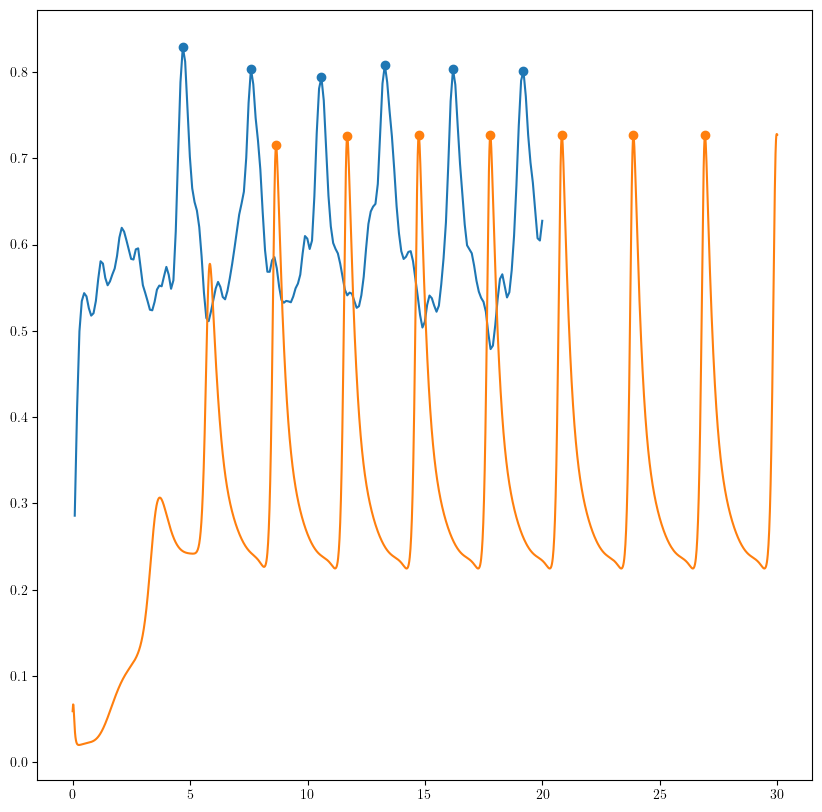

Any[4.690000082656505, 7.590000008153067, 8.66000999984132, 11.69000999972661]

In [28]:
peaks = []
#create figure
using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig, ax= plt.subplots(1, 1, figsize=(10,10))
# add df
for (ts,df) in zip(dts,dfs)
    N = length(df)
    tis = ts
    bw = 5*bwsj(df)

    smooth_df = KernelDensitySJ.smooth(tis,df,bw, tis)
    pks, vals = findmaxima(smooth_df)
            pks, proms = peakproms(pks, smooth_df)
            av_prom = mean(proms)
            new_pks = [pk for (i,(pk,val,prom)) in enumerate(zip(pks,vals,proms)) if prom ≥ av_prom]
            new_vals = [val for (i,(pk,val,prom)) in enumerate(zip(pks,vals,proms)) if prom ≥ av_prom]
    push!(peaks,tis[new_pks[1]])
    push!(peaks,tis[new_pks[2]])
    #push!(peaks,tis[new_pks[3]])

    ax.plot(tis,smooth_df)
    #ax.plot(tis,df)
    ax.scatter(tis[new_pks], new_vals)
end
print(peaks)
display(fig)
offset = peaks[3] - peaks[2]
times[2]  = times[2] #.- offset;
dts[2] = dts[2]; #.- offset;


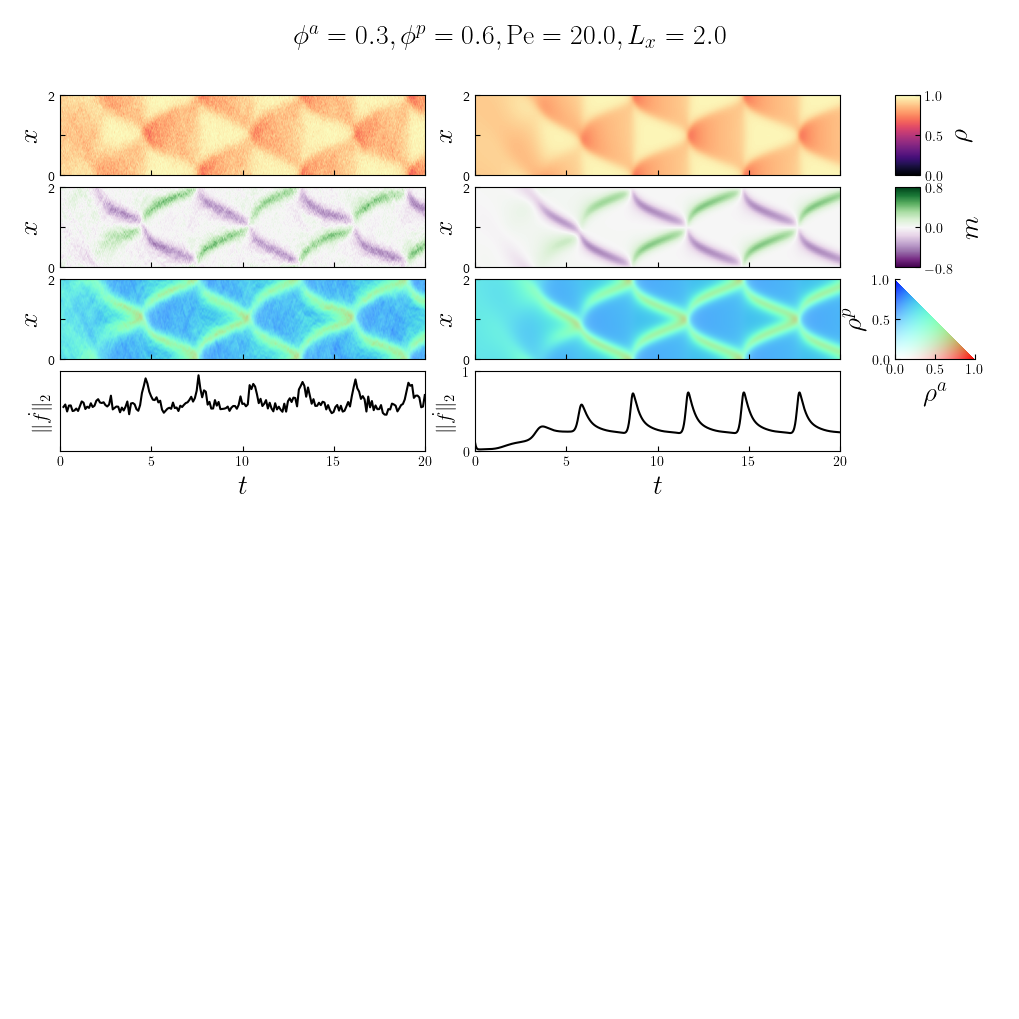

In [30]:
t_max = 20 #minimum(maximum.(times))
rhomax  = 1.0
rhomin  = 0.0
mag_lim = 0.8
height_1 = 0.08
width_1  = 0.365
side_gap_1  = 0.05
bottom_gap_1  = 0.65
gap = 0.012

cbar_y_top = bottom_gap_1 + 3*height_1 + 2*gap
cbar_width = 0.1
cbar_y_bot = bottom_gap_1+ gap+ height_1#bottom_gap_1 + cbar_width + 0.02
cbar_x = 0.885 #1- cbar_width#2*width_1+ 3*side_gap_1


height_2 = 0.175
width_2  = height_2
side_gap_2  = 0.1
bottom_gap_2  = 0.4
gap_2 = 0.06

t_stamp_x = 0.03
t_stamp_y = 0.05

sf = 1.0
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,Int64(10*sf)))
    ax = fig.add_axes([0,0,1,1],visible=true)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.spines["bottom"].set_visible(false)
    ax.spines["left"].set_visible(false)
    # ax = fig.add_axes([0.775,0,0.225,1],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
    # ax = fig.add_axes([0.025,0.5,0.95,0.45],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
# add image
    for (i,(rgb_image,ts)) in enumerate(zip(images, times))
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        ax.imshow(rgb_image; extent = [t_start,t_end,0,Lx], interpolation = "bilinear")
        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_yaxis().set_ticks(0:1.0:Lx)
        ax.set_yticklabels(["0","","2"])
        ax.get_xaxis().set_ticks([])
        ax.axis([0,t_max, 0, 2])
        ax.set_aspect((t_max/2)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = 20, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")
    end
# add mats
    for (i,(ts,ft)) in enumerate(zip(times, fts))
        global im1, im2
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1+2*height_1+2*gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        _, Nx, _ = size(ft)

        colmap = PyPlot.plt.cm.magma
        norm1 = matplotlib.colors.Normalize(vmin= rhomin, vmax= rhomax) 
        im1 = ax.matshow((ft[:,Nx:-1:1,1]+ft[:,Nx:-1:1,2]+ft[:,Nx:-1:1,3])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])

        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.xaxis.set_ticks([])
        ax.xaxis.tick_bottom()
        ax.get_yaxis().set_ticks(0:1.0:Lx)
        ax.set_yticklabels(["0","","2"])
        ax.axis([0,t_max, 0, 2])
        ax.set_aspect((t_max/2)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = 20, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")

        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1+height_1+gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]

        colmap = PyPlot.plt.cm.PRGn
        norm1 = matplotlib.colors.Normalize(vmin= -mag_lim, vmax= mag_lim) 
        im2 = ax.matshow((ft[:,Nx:-1:1,2]-ft[:,Nx:-1:1,1])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])
        
        # ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks(0:1.0:Lx)
        ax.set_yticklabels(["0","","2"])
        ax.xaxis.tick_bottom()
        ax.axis([0,t_max, 0, 2])
        ax.set_aspect((t_max/2)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = 20, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")
    end
# add tdiff
    for (i,(ts, df)) in enumerate(zip(dts, dfs))
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1-height_1-gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        ax.plot(ts[2:end], df[2:end]; color = "black")
        # if i ==1
        #     smooth_df = KernelDensitySJ.smooth(ts[2:end],df[2:end],0.2, ts[2:end])
        #     ax.plot(ts[2:end], smooth_df; color = "black")
        # else
        #     ax.plot(ts[2:end], df[2:end]; color = "black")
        # end
        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        
        #ax.get_xaxis().set_ticks([])
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        if i ==1
            ax.get_yaxis().set_ticks(3:1:4)
            ax.axis([0,t_max, 0, 1])
        else
            ax.get_yaxis().set_ticks(0:1.0:1)
            ax.axis([0,t_max, 0, 1])
        end
        ax.set_aspect((t_max/1)*(height_1/width_1)*sf)
        ax.set_ylabel(L"\Vert \dot f \Vert_2",fontsize = 15, rotation = 90)
        ax.set_xlabel(L"t", fontsize = 20)
        ax.tick_params(labelbottom = true, direction = "in")
    end
# add colour bars
    # ap cbar
    # cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, cbar_width, cbar_width])
    cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, height_1, height_1])

    Δ = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δ:Δ:1, y in Δ:Δ:1, i in 1:3 ]  
    rgb_image = rho_to_rgb(cbar_f );

    ax = cbar_ax
    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = 20)
    ax.set_ylabel(L"\rho^p",fontsize = 20, rotation = 90)
    ax.tick_params(direction = "in")
    # rho cbar
    # rho_cbar_ax = fig.add_axes([0.9, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    rho_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot+gap+height_1, 0.025, height_1])
    rho_cbar = fig.colorbar(im1, cax=rho_cbar_ax)
    # rho_cbar_ax.set_title(L"\rho",fontsize=25)
    rho_cbar_ax.set_ylabel(L"\rho",fontsize=20,rotation = 90)
    rho_cbar.set_ticks( rhomin:0.5:rhomax)
    rho_cbar_ax.yaxis.set_ticks_position("right")
    rho_cbar_ax.tick_params(direction = "in")
    # mag cbar
    # mag_cbar_ax = fig.add_axes([0.935, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    mag_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot, 0.025, height_1])
    # mag_cbar_ax.set_title(L"{m}",fontsize=25) #mathbf{}
    mag_cbar = fig.colorbar(im2, cax=mag_cbar_ax)
    mag_cbar.set_ticks((-mag_lim):0.8:mag_lim)
    mag_cbar_ax.tick_params(direction = "in")
    mag_cbar_ax.yaxis.set_ticks_position("right")
    mag_cbar_ax.set_ylabel(L"m",fontsize=20,rotation = 90)
#
#title
    @unpack v0, ϕa, ϕp, Lx = param
    latex_title = latexstring("\$ \\phi^a = $(ϕa), \\phi^p = $(ϕp), \\mathrm{Pe} = $(v0), L_x = $(Lx)\$")
    fig.suptitle(latex_title,fontsize=20)
# time stamp
    # latex_annotation = latexstring("\$ t = $(round( times[1][end];digits = 1))\$")
    # ax.annotate(latex_annotation, (t_stamp_x, bottom_gap_2+t_stamp_y), xycoords = "figure fraction", rotation = 90, fontsize = 20 )
display(fig)
fig_name = "sim_plot"
    @unpack ϕa, ϕp, v0 = param
    pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
    mkpath(pathname)
    filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0).pdf";
    PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


In [33]:
#create images
param = params[1]

using KernelDensitySJ, Peaks
images  = []
times   = []
fts     = []
dfs     = []
dts     = []
ϵ = 0.1

#load saves
    T = 30.0
    @pack! param = T
    pde_ts, f_saves = load_compress_pde(param)
    T = 20.0
    @pack! param = T 
    sim_ts, η_saves = load_compress_sim(param)
# create image
    @unpack N, Nx, N₁, N₂ = param
    ft_sim = local_average_timeseries(η_saves, ϵ, N, N₁, N₂)
    t_sim_rgb_image = rho_to_rgb(ft_sim);
    #find peak index
        pk = find_xpeak_ft(sim_ts , ft_sim; time_length = 0.1)
        centre = N₁ ÷ 2 + 1 
        ft_sim         = circshift(ft_sim, (0,-pk + centre, 0))
        t_sim_rgb_image = circshift(t_sim_rgb_image, (pk - centre,0, 0))
    #
    # compute t diff
        dt, df = t_dff(sim_ts , ft_sim; N=N₁, gap = 10)
    #
    push!(images, t_sim_rgb_image)
    push!(times, sim_ts)
    push!(fts, ft_sim)
    push!(dfs, df)
    push!(dts, dt)

    ft_pde = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
    t_pde_rgb_image = rho_to_rgb(ft_pde);
    #find peak index and shift to centre
        pk = find_xpeak_ft(pde_ts , ft_pde; time_length = 0.1)
        centre = Nx ÷ 2 + 1 
        ft_pde          = circshift(ft_pde, (0,-pk+ centre, 0))
        t_pde_rgb_image = circshift(t_pde_rgb_image, (pk - centre,0, 0))
    #
    # compute t diff
        dt, df = t_dff(pde_ts , ft_pde; N=Nx)
    #
    push!(images, t_pde_rgb_image)
    push!(times, pde_ts)
    push!(fts, ft_pde)
    push!(dfs, df)
    push!(dts, dt)
#

fast load


fast load


2-element Vector{Any}:
 [0.09000001912376392, 0.19000001674162073, 0.29000000196989606, 0.39000002181588406, 0.4900000239281212, 0.5900000137042076, 0.6900000039266877, 0.7900000090584642, 0.8900000018113602, 0.9900000297599975  …  19.090000001455284, 19.19000001784939, 19.290000006440195, 19.390000000054744, 19.490000000893172, 19.590000016395237, 19.690000049730994, 19.790000016384568, 19.890000054794722, 19.99000001307486]
 [0.0, 0.01000999999999976, 0.020009999999999355, 0.030009999999998947, 0.040000000000001576, 0.05000000000000464, 0.0600000000000077, 0.07000000000000556, 0.08000000000000168, 0.0900099999999978  …  29.900009999037223, 29.910009999036845, 29.920009999036466, 29.930009999036088, 29.94000999903571, 29.95000999903533, 29.960009999034952, 29.970009999034573, 29.980009999034195, 29.990009999033816]

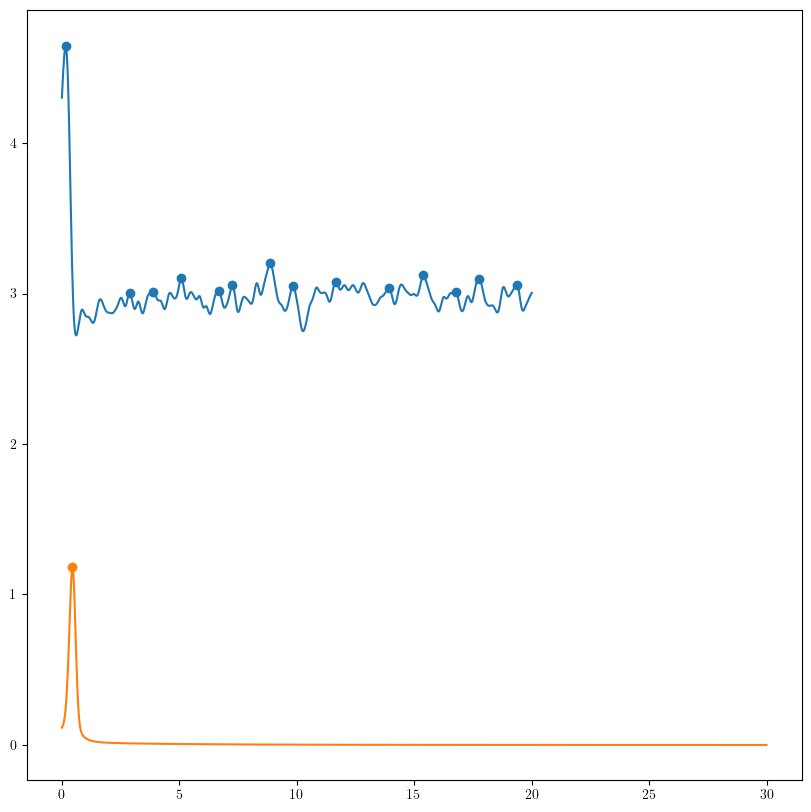

Any[0.16000001899828104, 0.45000000000030926]

In [19]:
peaks = []
#create figure
using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig, ax= plt.subplots(1, 1, figsize=(10,10))
# add df
for (ts,df) in zip(times,dfs)
    N = length(df)
    tis = ts
    bw = 0.1

    smooth_df = KernelDensitySJ.smooth(tis,df,bw, tis)
    pks, vals = findmaxima(smooth_df)
            pks, proms = peakproms(pks, smooth_df)
            av_prom = mean(proms)
            new_pks = [pk for (i,(pk,val,prom)) in enumerate(zip(pks,vals,proms)) if prom ≥ av_prom]
            new_vals = [val for (i,(pk,val,prom)) in enumerate(zip(pks,vals,proms)) if prom ≥ av_prom]
    push!(peaks,tis[new_pks[1]])

    ax.plot(tis,smooth_df)
    #ax.plot(tis,df)
    ax.scatter(tis[new_pks], new_vals)
end
print(peaks)
display(fig)
offset = peaks[2] - peaks[1]
times[2]  = times[2] .- offset;


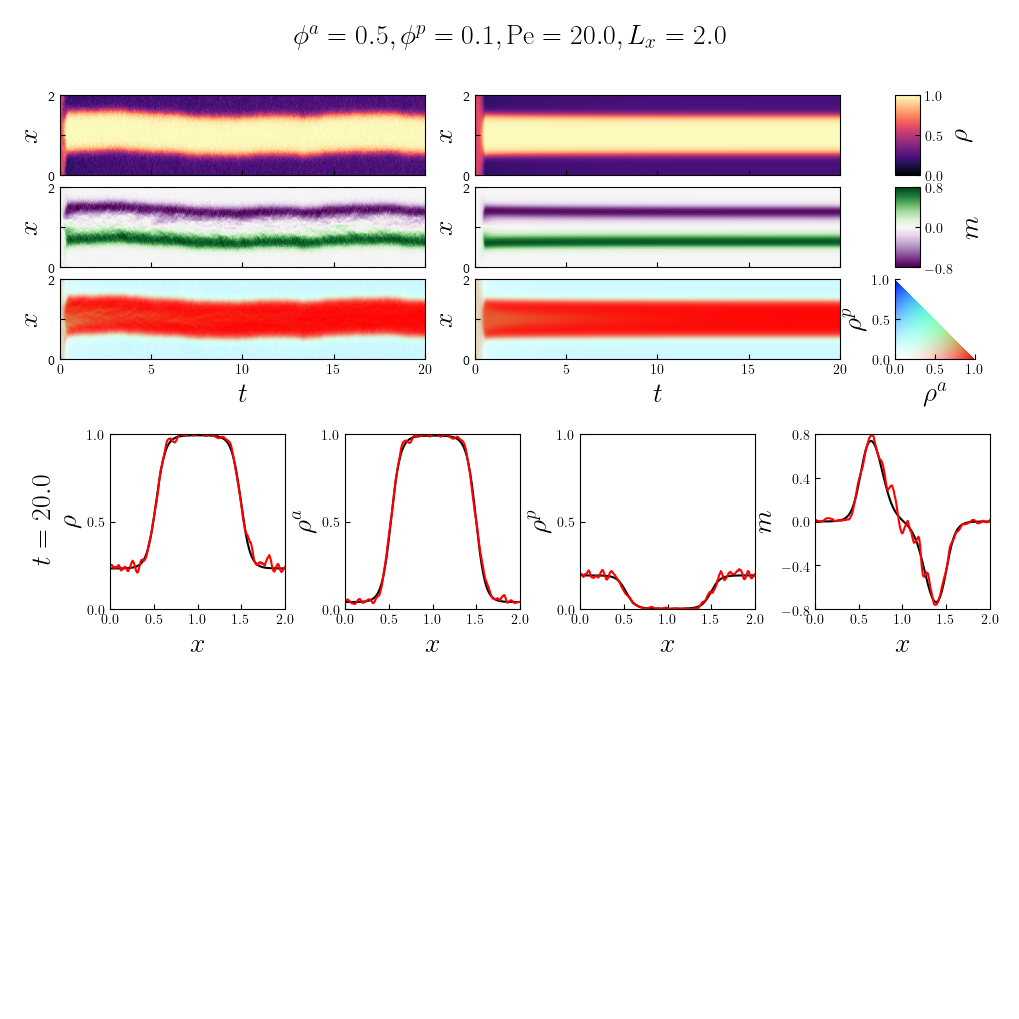

In [34]:
t_max = minimum(maximum.(times))
rhomax  = 1.0
rhomin  = 0.0
mag_lim = 0.8
height_1 = 0.08
width_1  = 0.365
side_gap_1  = 0.05
bottom_gap_1  = 0.65
gap = 0.012

cbar_y_top = bottom_gap_1 + 3*height_1 + 2*gap
cbar_width = 0.1
cbar_y_bot = bottom_gap_1+ gap+ height_1#bottom_gap_1 + cbar_width + 0.02
cbar_x = 0.885 #1- cbar_width#2*width_1+ 3*side_gap_1


height_2 = 0.175
width_2  = height_2
side_gap_2  = 0.1
bottom_gap_2  = 0.4
gap_2 = 0.06

t_stamp_x = 0.03
t_stamp_y = 0.05

sf = 1.0
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,Int64(10*sf)))
    ax = fig.add_axes([0,0,1,1],visible=true)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.spines["bottom"].set_visible(false)
    ax.spines["left"].set_visible(false)
    # ax = fig.add_axes([0.775,0,0.225,1],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
    # ax = fig.add_axes([0.025,0.5,0.95,0.45],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
# add image
    for (i,(rgb_image,ts)) in enumerate(zip(images, times))
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        ax.imshow(rgb_image; extent = [t_start,t_end,0,Lx], interpolation = "bilinear")
        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_yaxis().set_ticks(0:1.0:Lx)
        ax.set_yticklabels(["0","","2"])
        ax.get_xaxis().set_ticks([])
        ax.axis([0,t_max, 0, 2])
        ax.set_aspect((t_max/2)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = 20, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.set_xlabel(L"t", fontsize = 20)
        ax.tick_params(labelbottom = true, direction = "in")
    end
# add mats
    for (i,(ts,ft)) in enumerate(zip(times, fts))
        global im1, im2
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1+2*height_1+2*gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        _, Nx, _ = size(ft)

        colmap = PyPlot.plt.cm.magma
        norm1 = matplotlib.colors.Normalize(vmin= rhomin, vmax= rhomax) 
        im1 = ax.matshow((ft[:,Nx:-1:1,1]+ft[:,Nx:-1:1,2]+ft[:,Nx:-1:1,3])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])

        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.xaxis.set_ticks([])
        ax.xaxis.tick_bottom()
        ax.get_yaxis().set_ticks(0:1.0:Lx)
        ax.set_yticklabels(["0","","2"])
        ax.axis([0,t_max, 0, 2])
        ax.set_aspect((t_max/2)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = 20, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")

        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1+height_1+gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]

        colmap = PyPlot.plt.cm.PRGn
        norm1 = matplotlib.colors.Normalize(vmin= -mag_lim, vmax= mag_lim) 
        im2 = ax.matshow((ft[:,Nx:-1:1,2]-ft[:,Nx:-1:1,1])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])
        
        # ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks(0:1.0:Lx)
        ax.set_yticklabels(["0","","2"])
        ax.xaxis.tick_bottom()
        ax.axis([0,t_max, 0, 2])
        ax.set_aspect((t_max/2)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = 20, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")
    end
# add colour bars
    # ap cbar
    # cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, cbar_width, cbar_width])
    cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, height_1, height_1])

    Δ = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δ:Δ:1, y in Δ:Δ:1, i in 1:3 ]  
    rgb_image = rho_to_rgb(cbar_f );

    ax = cbar_ax
    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = 20)
    ax.set_ylabel(L"\rho^p",fontsize = 20, rotation = 90)
    ax.tick_params(direction = "in")
    # rho cbar
    # rho_cbar_ax = fig.add_axes([0.9, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    rho_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot+gap+height_1, 0.025, height_1])
    rho_cbar = fig.colorbar(im1, cax=rho_cbar_ax)
    # rho_cbar_ax.set_title(L"\rho",fontsize=25)
    rho_cbar_ax.set_ylabel(L"\rho",fontsize=20,rotation = 90)
    rho_cbar.set_ticks( rhomin:0.5:rhomax)
    rho_cbar_ax.yaxis.set_ticks_position("right")
    rho_cbar_ax.tick_params(direction = "in")
    # mag cbar
    # mag_cbar_ax = fig.add_axes([0.935, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    mag_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot, 0.025, height_1])
    # mag_cbar_ax.set_title(L"{m}",fontsize=25) #mathbf{}
    mag_cbar = fig.colorbar(im2, cax=mag_cbar_ax)
    mag_cbar.set_ticks((-mag_lim):0.8:mag_lim)
    mag_cbar_ax.tick_params(direction = "in")
    mag_cbar_ax.yaxis.set_ticks_position("right")
    mag_cbar_ax.set_ylabel(L"m",fontsize=20,rotation = 90)
#
#title
    @unpack v0, ϕa, ϕp, Lx = param
    latex_title = latexstring("\$ \\phi^a = $(ϕa), \\phi^p = $(ϕp), \\mathrm{Pe} = $(v0), L_x = $(Lx)\$")
    fig.suptitle(latex_title,fontsize=20)
#
# add plots 
    # rho
    ax = fig.add_axes([side_gap_2, bottom_gap_2, width_2, height_2])

        sim_mag = fts[1][end,:,2] +fts[1][end,:,1] +fts[1][end,:,3]
        pde_mag = fts[2][end,:,2] +fts[2][end,:,1] +fts[2][end,:,3]

        @unpack N, Δx = param
        ax.plot(Δx:Δx:Lx, pde_mag; color = "black")
        ax.plot((1/N):(1/N):Lx, sim_mag; color = "red")# linestyle = "dashed")
        
        ax.get_xaxis().set_ticks(0:0.5:Lx)
        ax.get_yaxis().set_ticks(rhomin:0.5:rhomax)
        ax.set_xlabel(L"x", fontsize = 20)
        ax.set_ylabel(L"\rho",fontsize = 20, rotation = 90)
        ax.set_aspect((Lx/(rhomax-rhomin)))
        ax.axis([0,Lx,rhomin,rhomax])
        ax.tick_params(direction = "in")
    # rho a
    ax = fig.add_axes([side_gap_2+gap_2+width_2, bottom_gap_2, width_2, height_2])

        sim_mag = fts[1][end,:,2] + fts[1][end,:,1]
        pde_mag = fts[2][end,:,2] + fts[2][end,:,1]

        ax.plot(Δx:Δx:Lx, pde_mag; color = "black")
        ax.plot((1/N):(1/N):Lx, sim_mag; color = "red")# linestyle = "dashed")
        
        ax.get_xaxis().set_ticks(0:0.5:Lx)
        ax.get_yaxis().set_ticks(rhomin:0.5:rhomax)
        ax.set_xlabel(L"x", fontsize = 20)
        ax.set_ylabel(L"\rho^a",fontsize = 20, rotation = 90)
        ax.set_aspect((Lx/(rhomax-rhomin)))
        ax.axis([0,Lx,rhomin,rhomax])
        ax.tick_params(direction = "in")
    # rho p
    ax = fig.add_axes([side_gap_2+2*(gap_2+width_2), bottom_gap_2, width_2, height_2])

        sim_mag = fts[1][end,:,3] 
        pde_mag = fts[2][end,:,3] 

        ax.plot(Δx:Δx:Lx, pde_mag; color = "black")
        ax.plot((1/N):(1/N):Lx, sim_mag; color = "red")# linestyle = "dashed")
        
        ax.get_xaxis().set_ticks(0:0.5:Lx)
        ax.get_yaxis().set_ticks(rhomin:0.5:rhomax)
        ax.set_xlabel(L"x", fontsize = 20)
        ax.set_ylabel(L"\rho^p",fontsize = 20, rotation = 90)
        ax.set_aspect((Lx/(rhomax-rhomin)))
        ax.axis([0,Lx,rhomin,rhomax])
        ax.tick_params(direction = "in")
    # mag
    ax = fig.add_axes([side_gap_2+3*(gap_2+width_2),bottom_gap_2, width_2, height_2])

        sim_mag = fts[1][end,:,2] - fts[1][end,:,1]
        pde_mag = fts[2][end,:,2] - fts[2][end,:,1]

        # sim_mag = fts[3][end,:,2] +fts[3][end,:,1] +fts[3][end,:,3]
        # pde_mag = fts[4][end,:,2] +fts[4][end,:,1] +fts[4][end,:,3]

        ax.plot(Δx:Δx:Lx, pde_mag; color = "black")
        ax.plot((1/N):(1/N):Lx, sim_mag; color = "red")# linestyle = "dashed")
        
        ax.get_xaxis().set_ticks(0:0.5:Lx)
        ax.get_yaxis().set_ticks(-mag_lim:0.4:mag_lim)
        ax.set_xlabel(L"x", fontsize = 20)
        ax.set_ylabel(L"m",fontsize = 20, rotation = 90)
        ax.set_aspect((Lx/(2*mag_lim)))
        ax.axis([0,Lx,-mag_lim,mag_lim])
        ax.tick_params(direction = "in")
# time stamp
    latex_annotation = latexstring("\$ t = $(round( times[1][end];digits = 1))\$")
    ax.annotate(latex_annotation, (t_stamp_x, bottom_gap_2+t_stamp_y), xycoords = "figure fraction", rotation = 90, fontsize = 20 )
display(fig)
fig_name = "sim_plot"
    @unpack ϕa, ϕp, v0 = param
    pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
    mkpath(pathname)
    filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0).pdf";
    PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)
